In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
batch1 = pickle.load(open("E:/Data/TRI/Batch Data/batch1.pkl", 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [4]:
numBat1 = len(batch1.keys())
numBat1

41

In [5]:
batch2 = pickle.load(open('E:/Data/TRI/Batch Data/batch2.pkl','rb'))

In [6]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [7]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [8]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [9]:
numBat2 = len(batch2.keys())
numBat2

43

In [10]:
batch3 = pickle.load(open('E:/Data/TRI/Batch Data/batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

In [11]:
numBat3 = len(batch3.keys())
numBat3

40

In [12]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

In [13]:
bat_dict = {**batch1, **batch2, **batch3}

Text(0, 0.5, 'Discharge Capacity (Ah)')

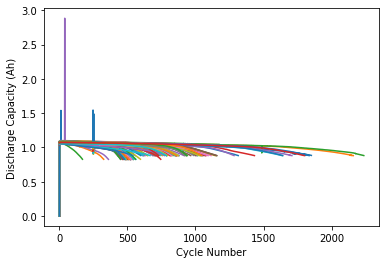

In [14]:
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

### Train and Test Split
If you are interested in using the same train/test split as the paper, use the indices specified below

In [15]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat);

In [16]:
batch1["b1c0"]["cycles"]["1"].keys()

dict_keys(['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'dQdV', 't'])

In [17]:
batch1["b1c0"]["summary"]["IR"]

array([0.        , 0.01674235, 0.01672431, ..., 0.0181332 , 0.0181233 ,
       0.0181211 ])

In [18]:
v_i = batch1["b1c0"]["cycles"]["1"]["V"] / batch1["b1c0"]["cycles"]["1"]["I"]

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [19]:
batch1["b1c0"]["cycles"]["222"]["I"]

array([ 0.        ,  0.21582256,  0.21582256, ..., -0.02285871,
       -0.02285871,  0.        ])

In [20]:
len(v_i)

1087

In [21]:
for i in range(len(v_i)):
    if v_i[i] == np.inf:
        v_i[i] = 0

In [22]:
np.mean(v_i)

24.98901870545501

In [50]:
def voltage_div_current(batch = batch1, key1 = "b1c0", cycle_num = 1):
    voltage = batch[key1]["cycles"][str(cycle_num)]["V"][1:-1]
    current = batch[key1]["cycles"][str(cycle_num)]["I"][1:-1]
    ir = batch[key1]["summary"]["IR"][cycle_num]
    calc_ir = voltage/current
    
    for i in range(len(calc_ir)):
        if calc_ir[i] == np.inf:
            calc_ir[i] = 0
    
    print("Is V/I equal to internal resistance?", np.array_equal(ir, np.mean(calc_ir)))
    return calc_ir

In [51]:
v_i = voltage_div_current(batch2, "b2c10", 9)
print(v_i)
print(v_i.mean())

Is V/I equal to internal resistance? False
[8.38143527 4.82629004 3.57998788 ... 0.         0.         0.        ]
160.69618714151886


C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [23]:
batch1.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45'])

In [183]:
voltage = batch1["b1c45"]["cycles"]["1"]["V"][1:-1]
current = batch1["b1c45"]["cycles"]["1"]["I"][1:-1]
v_div_c = voltage_div_current(batch1, "b1c45", 1)

voltage = pd.DataFrame(voltage, columns = ["Voltage"])
current = pd.DataFrame(current, columns = ["Current"])
v_div_c = pd.DataFrame(v_div_c, columns = ["Internal Resistance (Calculated)"])

Is V/I equal to internal resistance? False


C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [184]:
ir_df = pd.concat([voltage, current, v_div_c], axis=1)
ir_df

,Voltage,Current,Internal Resistance (Calculated)
0,2.034660,0.395282,5.147358
1,2.045611,0.557244,3.670943
2,2.058541,0.716539,2.872895
3,2.073116,0.876867,2.364230
4,2.098242,1.116988,1.878482
...,...,...,...
1068,2.000081,-0.020833,-96.003335
1069,2.000081,-0.020833,-96.003335
1070,2.000283,-0.019869,-100.671672
1071,2.001482,-0.019869,-100.732001


In [185]:
n = len(ir_df)
dV = np.empty(n)
dI = np.empty(n)
for i in range(1, len(ir_df)):
    v_diff = ir_df["Voltage"][i] - ir_df["Voltage"][i-1]
    dV[i] = v_diff
    i_diff = ir_df["Current"][i] - ir_df["Voltage"][i-1]
    dI[i] = i_diff

dVdI = dV/dI

dV = pd.DataFrame(dV, columns = ["dV"])
dI = pd.DataFrame(dI, columns = ["dI"])
dVdI = pd.DataFrame(dVdI, columns = ["dV/dI"])
dVdI.iloc[0] = np.nan

In [186]:
ir_df = pd.concat([ir_df, dV, dI, dVdI], axis=1)
ir_df

,Voltage,Current,Internal Resistance (Calculated),dV,dI,dV/dI
0,2.034660,0.395282,5.147358,4.047386e-320,4.047386e-320,NaN
1,2.045611,0.557244,3.670943,1.095100e-02,-1.477416e+00,-0.007412
2,2.058541,0.716539,2.872895,1.292990e-02,-1.329072e+00,-0.009729
3,2.073116,0.876867,2.364230,1.457500e-02,-1.181674e+00,-0.012334
4,2.098242,1.116988,1.878482,2.512650e-02,-9.561273e-01,-0.026279
...,...,...,...,...,...,...
1068,2.000081,-0.020833,-96.003335,9.250000e-05,-2.020822e+00,-0.000046
1069,2.000081,-0.020833,-96.003335,0.000000e+00,-2.020914e+00,-0.000000
1070,2.000283,-0.019869,-100.671672,2.022000e-04,-2.019950e+00,-0.000100
1071,2.001482,-0.019869,-100.732001,1.198700e-03,-2.020152e+00,-0.000593


In [187]:
#batch 1, b1c1, cycle 1
display(ir_df)
print("Mean Voltage/Current: ", ir_df["Internal Resistance (Calculated)"].mean())
print("Mean dV/dI: ", ir_df["dV/dI"].mean())

,Voltage,Current,Internal Resistance (Calculated),dV,dI,dV/dI
0,2.034660,0.395282,5.147358,4.047386e-320,4.047386e-320,NaN
1,2.045611,0.557244,3.670943,1.095100e-02,-1.477416e+00,-0.007412
2,2.058541,0.716539,2.872895,1.292990e-02,-1.329072e+00,-0.009729
3,2.073116,0.876867,2.364230,1.457500e-02,-1.181674e+00,-0.012334
4,2.098242,1.116988,1.878482,2.512650e-02,-9.561273e-01,-0.026279
...,...,...,...,...,...,...
1068,2.000081,-0.020833,-96.003335,9.250000e-05,-2.020822e+00,-0.000046
1069,2.000081,-0.020833,-96.003335,0.000000e+00,-2.020914e+00,-0.000000
1070,2.000283,-0.019869,-100.671672,2.022000e-04,-2.019950e+00,-0.000100
1071,2.001482,-0.019869,-100.732001,1.198700e-03,-2.020152e+00,-0.000593


Mean Voltage/Current:  -47.61044599526766
Mean dV/dI:  0.0009210222692320728


In [151]:
dV = np.empty(1089)
dI = np.empty(1089)
for i in range(1, len(ir_df)):
    v_diff = ir_df["Voltage"][i] - ir_df["Voltage"][i-1]
    dV[i] = v_diff
    i_diff = ir_df["Current"][i] - ir_df["Voltage"][i-1]
    dI[i] = i_diff

In [156]:
np.mean(dV/dI)

0.002128809388619022

In [146]:
numerator = batch1["b1c1"]["cycles"]["1"]["t"][1:-1]
denominator = batch1["b1c1"]["cycles"]["1"]["T"][1:-1]

frac = numerator/denominator

for i in range(len(frac)):
    if frac[i] == np.inf:
        frac[i] = 0

np.mean(frac)

0.8309855198374807

In [110]:
batch1["b1c1"]["cycles"]["4"]

{'I': array([ 0.        ,  0.21614682,  0.39605314, ..., -0.02810305,
        -0.02810305,  0.        ]),
 'Qc': array([0.0000000e+00, 6.6333797e-07, 6.6333797e-07, ..., 1.0777587e+00,
        1.0777587e+00, 1.0777587e+00]),
 'Qd': array([0.0000000e+00, 2.4583597e-11, 2.4583597e-11, ..., 1.0781505e+00,
        1.0781505e+00, 1.0781505e+00]),
 'Qdlin': array([-2.30365018e-04, -2.00776557e-04, -1.71981293e-04, -1.43871629e-04,
        -1.16339966e-04, -8.92787073e-05, -6.25802555e-05, -3.61370127e-05,
        -9.84138162e-06,  1.64142354e-05,  4.27374360e-05,  6.92358175e-05,
         9.60169776e-05,  1.23188514e-04,  1.50858024e-04,  1.79133105e-04,
         2.08116873e-04,  2.37870149e-04,  2.68430492e-04,  2.99835223e-04,
         3.32121661e-04,  3.65327128e-04,  3.99488942e-04,  4.34634759e-04,
         4.70727997e-04,  5.07705872e-04,  5.45505523e-04,  5.84064089e-04,
         6.23318709e-04,  6.63206524e-04,  7.03687507e-04,  7.44801468e-04,
         7.86605657e-04,  8.29157325e-0

In [111]:
batch1["b1c1"]["cycles"]["1"].keys()

dict_keys(['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'dQdV', 't'])

In [133]:
batch1["b1c1"]["cycles"]["1"]["Qc"][1:-1]

array([1.0401919e-06, 1.0401919e-06, 1.0401919e-06, ..., 1.0750588e+00,
       1.0750588e+00, 1.0750588e+00])